In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))      

/kaggle/input/epasealevel/epa-sea-level.csv


![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://lh3.googleusercontent.com/9ftEvrB7N7lYQ7m8zsJL4jvUF7UPEKTNvfwsLc79JGfn0xCbPkG9BO_da2os4KiV"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# SEA LEVEL PREDICTOR.

In this Exploratory Data Analysis, we anaylize a dataset of the global average sea level change since 1880. We will use the data to predict the sea level change through year 2050, using official data from [CSIRO](https://www.cmar.csiro.au/sealevel/sl_hist_last_decades.html).

We will use the data to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Exploratory Data Analysis (EDA)

### A- Loading libraries. Hands on!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Loading our data:

As we saw on previous courses we can read data simply using Python.

In [3]:
df=pd.read_csv('../input/epasealevel/epa-sea-level.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- A glance at the data:

In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [6]:
df.shape

(134, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


### Column organizacion for epa-sea-level.csv

_1- Column distribution:_

**TIME-data** is provided through the column *Year*

**MEASUREMENT-data** is provided through **4** columns (CSIRO Adjusted Sea Level, Lower Error Bound, Upper Error Bound, NOAA Adjusted Sea Level)

For a total of **5** columns and **134** measuments

_2- Column ranges/organization:_

**TIME-data** ranges from 1880 to 2013

**MEASUREMENT-data** has ranged from -0.44 to 9,32 GMSL

_3- Column AXES of analysis:_

The Axes column in the table is **CSIRO Adjusted Sea Level**. We can **TIME**-plot to do the proyections requiered.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Analysis and visualization:

#### D.1. Numerical analysis and visualization

##### D.1.1 Let's visualize all the series.

In [9]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [10]:
boxplot_cols = ['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level']

Year                           AxesSubplot(0.125,0.536818;0.227941x0.343182)
CSIRO Adjusted Sea Level    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Lower Error Bound           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Upper Error Bound                 AxesSubplot(0.125,0.125;0.227941x0.343182)
NOAA Adjusted Sea Level        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

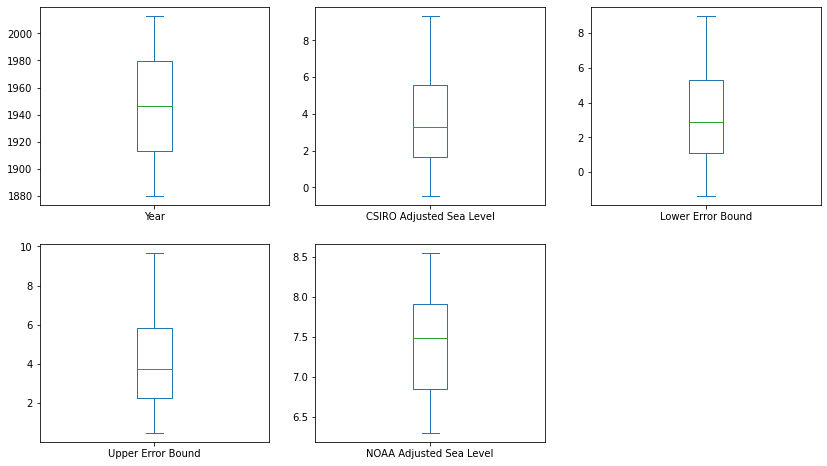

In [11]:
df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

* 50% of the sea level are between 1.63 to 5.58 GMSL.

##### D.1.2 Let's pick one of the series to make a deeper analysis

We'll analyze the _'CSIRO Adjusted Sea Level'_ column:

In [12]:
df['CSIRO Adjusted Sea Level'].describe()

count    134.000000
mean       3.650341
std        2.485692
min       -0.440945
25%        1.632874
50%        3.312992
75%        5.587598
max        9.326772
Name: CSIRO Adjusted Sea Level, dtype: float64

In [13]:
df['CSIRO Adjusted Sea Level'].median()

3.312992123

In [14]:
df['CSIRO Adjusted Sea Level'].mean()

3.6503408118805987

_**BOX Diagrams**_

<AxesSubplot:>

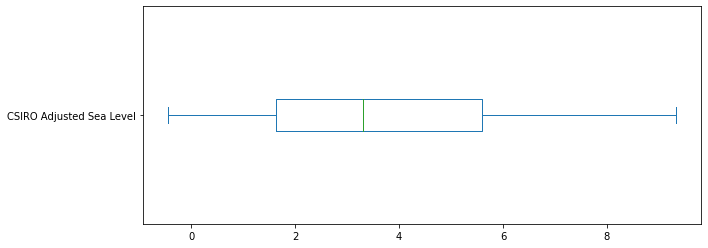

In [15]:
df['CSIRO Adjusted Sea Level'].plot(kind='box', vert=False, figsize=(10,4))

_**DENSITY diagram:**_

<AxesSubplot:ylabel='Density'>

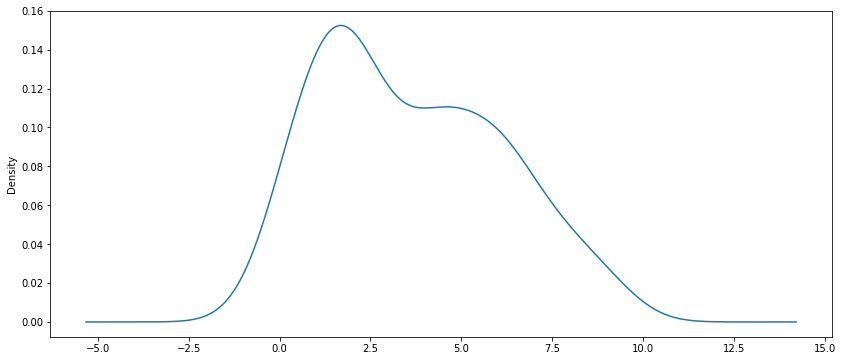

In [16]:
df['CSIRO Adjusted Sea Level'].plot(kind='density', figsize=(14,6))

_**(DENSITY + mean + median) diagram:**_

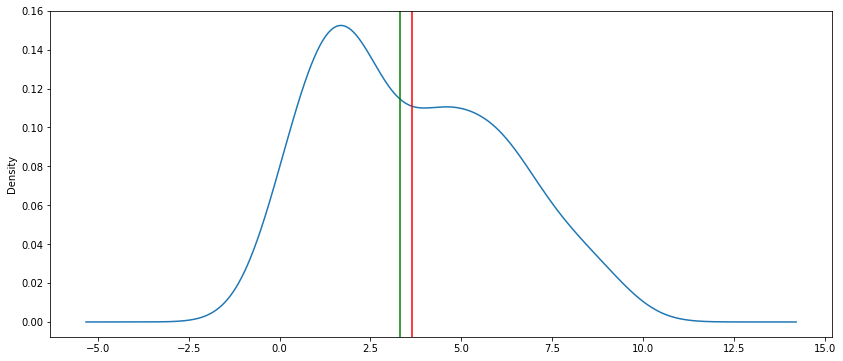

In [17]:
ax = df['CSIRO Adjusted Sea Level'].plot(kind='density', figsize=(14,6))
ax.axvline(df['CSIRO Adjusted Sea Level'].mean(), color='red')
ax.axvline(df['CSIRO Adjusted Sea Level'].median(), color='green')

_**HISTOGRAM diagram:**_

Text(0.5, 0, 'GMSL')

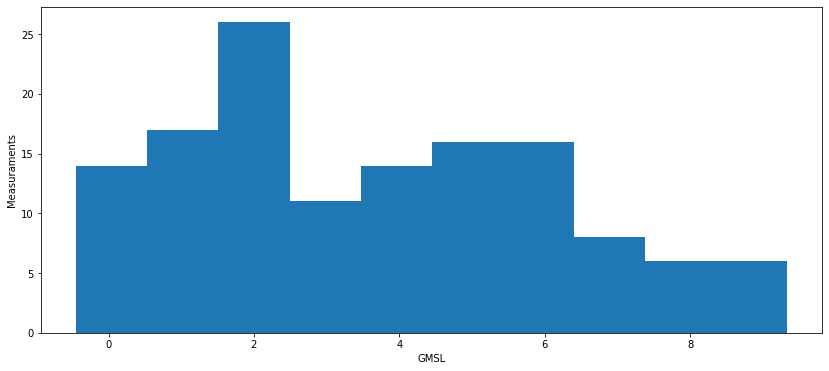

In [18]:
ax = ax = df['CSIRO Adjusted Sea Level'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Measuraments')
ax.set_xlabel('GMSL')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### E- Relationship between the columns:

Can we find any significant relationship?

In [19]:
corr = df.corr()

corr

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,1.000000,0.984757,0.989783,0.976848,0.993606
CSIRO Adjusted Sea Level,0.984757,1.000000,0.999132,0.998848,0.976708
Lower Error Bound,0.989783,0.999132,1.000000,0.995980,0.976050
Upper Error Bound,0.976848,0.998848,0.995980,1.000000,0.977029
NOAA Adjusted Sea Level,0.993606,0.976708,0.976050,0.977029,1.000000


_**CORRELATION MAP:**_

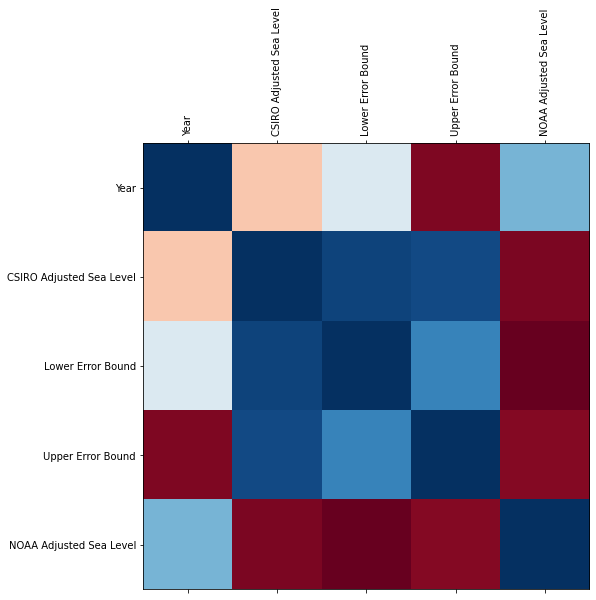

In [20]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

_**SCATTER PLOT 1 ('no correlation'):**_

<AxesSubplot:xlabel='NOAA Adjusted Sea Level', ylabel='Lower Error Bound'>

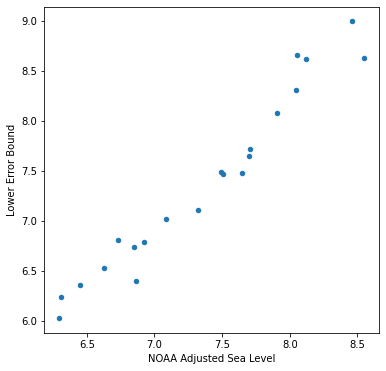

In [21]:
df.plot(kind='scatter', x='NOAA Adjusted Sea Level', y='Lower Error Bound', figsize=(6,6))

_**SCATTER PLOT 2 (correlation):**_

<AxesSubplot:xlabel='CSIRO Adjusted Sea Level', ylabel='Lower Error Bound'>

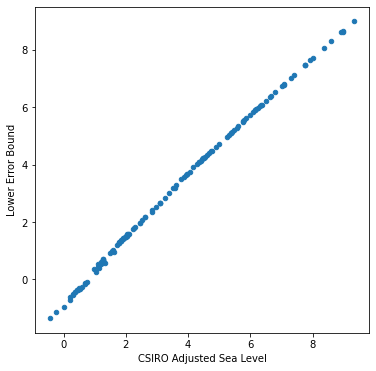

In [22]:
df.plot(kind='scatter', x='CSIRO Adjusted Sea Level', y='Lower Error Bound', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### F- Regression:

Let's solve the main inquiries of the analysis.

#### F.1. Line of best fit



* Let's obtein first the main value of the regression:

In [23]:
res = stats.linregress(x=df['Year'],y= df['CSIRO Adjusted Sea Level'])

res

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

* Now, let's draw the function out of the values obteined:

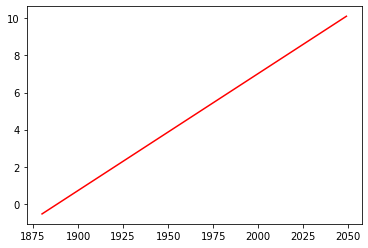

In [24]:
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred +res.intercept
plt.plot(x_pred, y_pred, 'r')

* Now, let's draw the function on top of the original data:

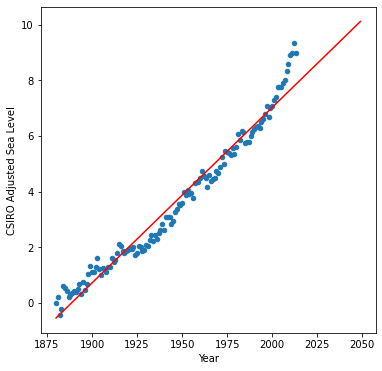

In [25]:
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', figsize=(6,6))
# First line of best fit
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred +res.intercept
plt.plot(x_pred, y_pred, 'r')

as we can see, the regresion does not match well with the data after 2000. So, let's find a new line of best fit using data from year 2000 through the most recent year in the dataset.

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

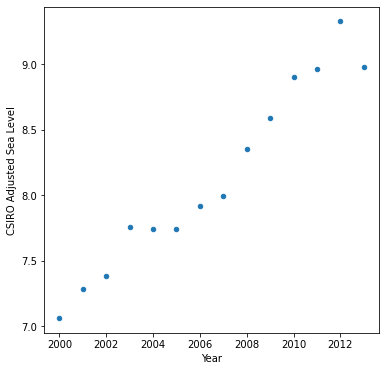

In [26]:
new_df=df.loc[df['Year']>=2000]
new_df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', figsize=(6,6))

Let's do the regression for this part:

In [27]:
res_2 = stats.linregress(x=new_df['Year'],y= new_df['CSIRO Adjusted Sea Level'])

res_2

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

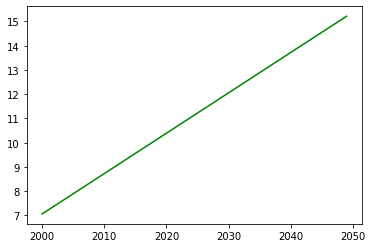

In [28]:
x_pred_2 = pd.Series([i for i in range(2000,2050)])
y_pred_2 = res_2.slope*x_pred_2 +res_2.intercept
plt.plot(x_pred_2, y_pred_2, 'g')

and, now let' plot the three charts together:

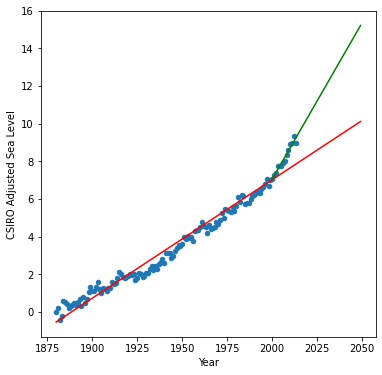

In [29]:
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', figsize=(6,6))
# First line of best fit
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred +res.intercept
plt.plot(x_pred, y_pred, 'r')
# Second line of best fit
x_pred_2 = pd.Series([i for i in range(2000,2050)])
y_pred_2 = res_2.slope*x_pred_2 +res_2.intercept
plt.plot(x_pred_2, y_pred_2, 'g')

* what is gonna be the level of sea in 2050, according to the First line of best fit and the second line of best fit?

In [30]:
# Level with the First line of best fit
y1 = res.slope*2050 +res.intercept
y1

10.175455257136548

In [31]:
# Level with the Second line of best fit
y2 = res_2.slope*2050 +res_2.intercept
y2

15.382443524364874